In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
test = pd.read_csv("Test_Arabic_Digit.txt", header=None, sep=' ')

block_lens = []
length = 0
for i in range(len(test)):
# for i in range(150):
#     print(test.iloc[i])
#     print(test.iloc[i].isna())
#     print(test.iloc[i].isna()[0])
#     if (test.iloc[i].isna())[0]:
    if np.any(test.iloc[i].isna()):
        if length > 0:
            block_lens.append(length)
        length = 0
    else:
        length += 1



# with open("Test_Arabic_Digit.txt", "r") as infile:
#     length = 0
#     for line in infile.readlines()[:5]:
            
block_lens
# It loads in empty lines as rows of nan. Drop them
# test = test.dropna()

# train = pd.read_csv("Train_Arabic_Digit.txt", header=None, sep=' ')
# train = test.dropna()



[28,
 28,
 34,
 33,
 33,
 32,
 34,
 31,
 34,
 35,
 29,
 29,
 30,
 31,
 29,
 32,
 33,
 32,
 34,
 33,
 26,
 17,
 24,
 31,
 31,
 37,
 35,
 33,
 30,
 29,
 47,
 39,
 37,
 32,
 34,
 31,
 42,
 22,
 38,
 41,
 38,
 32,
 36,
 36,
 34,
 38,
 38,
 34,
 37,
 33,
 39,
 41,
 36,
 35,
 35,
 35,
 34,
 36,
 39,
 37,
 43,
 26,
 36,
 29,
 33,
 36,
 30,
 34,
 34,
 34,
 38,
 34,
 36,
 32,
 36,
 42,
 40,
 47,
 47,
 43,
 35,
 34,
 35,
 37,
 35,
 35,
 37,
 36,
 37,
 38,
 31,
 29,
 26,
 25,
 23,
 37,
 35,
 40,
 40,
 34,
 40,
 41,
 43,
 41,
 42,
 34,
 37,
 36,
 39,
 42,
 23,
 23,
 24,
 23,
 22,
 20,
 22,
 20,
 23,
 23,
 37,
 27,
 33,
 34,
 34,
 38,
 35,
 34,
 29,
 39,
 40,
 27,
 38,
 30,
 33,
 28,
 30,
 29,
 30,
 31,
 34,
 32,
 38,
 31,
 31,
 31,
 33,
 35,
 34,
 33,
 33,
 30,
 32,
 29,
 31,
 36,
 38,
 24,
 32,
 28,
 34,
 34,
 37,
 33,
 36,
 37,
 38,
 42,
 40,
 38,
 38,
 36,
 37,
 38,
 37,
 38,
 39,
 37,
 34,
 36,
 36,
 38,
 37,
 41,
 40,
 36,
 40,
 41,
 37,
 37,
 32,
 35,
 33,
 32,
 35,
 29,
 32,
 33,
 28,
 30,


(array([  5.,  26., 139., 733., 752., 427.,  98.,   9.,   2.,   8.]),
 array([ 7. , 14.6, 22.2, 29.8, 37.4, 45. , 52.6, 60.2, 67.8, 75.4, 83. ]),
 <BarContainer object of 10 artists>)

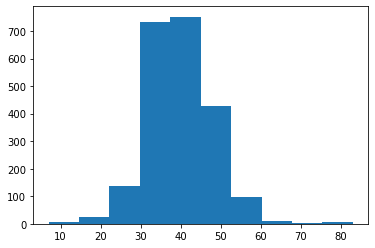

In [48]:
plt.hist(block_lens)

In [49]:
len(block_lens)

2199

In [50]:
13 * 83

1079

In [19]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,1.25720,-8.2449,0.8483,-1.5782,0.473600,-0.063273,0.424810,0.500170,0.70420,0.289730,0.076053,0.025883,-0.22968
2,3.36380,-9.0154,1.4104,-1.5884,1.372500,-0.334810,1.052900,0.898040,0.79525,0.741120,-0.153510,0.517180,0.44204
3,3.44610,-9.4871,1.3425,-1.4066,1.442200,0.124470,0.581990,0.889840,0.90260,0.115210,-0.047091,0.409890,0.81545
4,4.77300,-10.0070,1.2143,-2.0118,2.086400,0.285620,0.528680,0.339710,1.16880,0.425690,-0.470990,0.508600,-0.33061
5,5.33170,-9.6834,1.5131,-2.3545,1.693300,0.066311,-0.088666,0.168260,0.24546,-0.347490,-0.098748,0.810930,-0.12837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89258,4.35140,-3.9806,-3.5540,-3.8917,-0.002907,0.040458,-2.295500,0.150910,-1.23970,-0.632770,-0.559110,0.421010,0.85783
89259,4.04650,-3.3982,-3.2422,-3.5811,0.230780,0.105050,-2.223700,-0.056953,-1.16340,-0.061821,-0.542650,0.784310,0.92638
89260,3.51670,-2.6448,-2.5283,-3.6338,0.563620,-0.274010,-1.881700,-0.341450,-1.21240,-0.204070,-0.416860,0.837290,1.32030
89261,2.44880,-2.6228,-1.9276,-2.9711,0.348380,-0.429250,-1.428500,-0.852370,-1.29930,-0.864420,-0.152410,0.823540,1.32760
